In [83]:
import pandas as pd
import scipy.sparse as sp
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [120]:
SPIN_sample = pd.read_csv("../../../alternatives/SPIN-master/data/test_Hi-C_chr1.txt", sep = "\t", header = None)
SPIN_sample.columns = ["s", "t", "weight"]

In [121]:
SPIN_bins = pd.read_csv("../../../alternatives/SPIN-master/data/test_bin_chr1.bed", sep = "\t", header = None)
map = (SPIN_bins.iloc[:,1]/25000).astype(int)

In [122]:
SPIN_sample['s'] = map[SPIN_sample['s']].values
SPIN_sample['t'] = map[SPIN_sample['t']].values
SPIN_sample['dist'] = abs(SPIN_sample['s']-SPIN_sample['t'])

In [124]:
distal_SPIN_sample = SPIN_sample[SPIN_sample['dist']>1]

In [136]:
distal_SPIN_sample.shape

(854, 4)

In [125]:
min_ind = distal_SPIN_sample.loc[:,['s','t']].min(axis=1)
max_ind = distal_SPIN_sample.loc[:,['s','t']].max(axis=1)
distal_SPIN_sample.loc[:,'s'] = min_ind
distal_SPIN_sample.loc[:,'t'] = max_ind
distal_SPIN_sample.drop_duplicates(inplace=True)

/home/nedooshki/.local/lib/python3.6/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/home/nedooshki/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [127]:
chr1_hic = pd.read_csv('../../../data/K562/hg38/Hi-C/oe_25000_VC_weibull/chr1_chr1.txt', sep = "\t", header = None)
chr1_hic.columns = ['source', 'target', 'weight', 'pvalue']
chr1_hic.loc[:,'s'] = (chr1_hic.loc[:,'source']/25000).astype(int)
chr1_hic.loc[:,'t'] = (chr1_hic.loc[:,'target']/25000).astype(int)
chr1_hic['dist'] = abs(chr1_hic['s']-chr1_hic['t'])
distal_chr1_hic = chr1_hic[chr1_hic['dist']>1]

In [128]:
ob_chr1_hic = pd.read_csv('../../../data/K562/hg38/Hi-C/chr1_chr1.txt', sep = "\t", header = None)
ob_chr1_hic.columns = ['source', 'target', 'weight']
ob_chr1_hic.loc[:,'s'] = (ob_chr1_hic.loc[:,'source']/25000).astype(int)
ob_chr1_hic.loc[:,'t'] = (ob_chr1_hic.loc[:,'target']/25000).astype(int)
ob_chr1_hic['dist'] = abs(ob_chr1_hic['s']-ob_chr1_hic['t'])
distal_ob_chr1_hic = ob_chr1_hic[ob_chr1_hic['dist']>1]

In [135]:
th_chr1_hic = distal_chr1_hic[distal_chr1_hic.loc[:,'pvalue']<0.00001]
print('number of significant distal interactions after thresholding is {}'.format(th_chr1_hic[th_chr1_hic['dist']>1].shape[0]))

number of significant distal interactions after thresholding is 4546


In [130]:
nlargest_chr1_hic = distal_chr1_hic.nlargest(distal_SPIN_sample.shape[0], 'weight')
nlargest_ob_chr1_hic = distal_ob_chr1_hic.nlargest(distal_SPIN_sample.shape[0], 'weight')

In [131]:
oe_nlargest_overlap = pd.merge(distal_SPIN_sample,nlargest_chr1_hic, on = ['s','t']).shape[0]
ob_nlargest_overlap = pd.merge(distal_SPIN_sample,nlargest_ob_chr1_hic, on = ['s','t']).shape[0]
th_overlap = pd.merge(distal_SPIN_sample,th_chr1_hic, on = ['s','t']).shape[0]

In [132]:
print(oe_nlargest_overlap, ob_nlargest_overlap, th_overlap)

44 29 141


/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nedooshki/miniconda3/envs/embedding/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

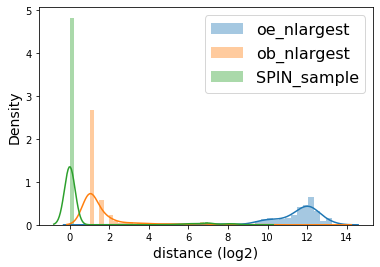

In [133]:
fig = plt.figure(figsize=(6,4))
sns.distplot(np.log2(nlargest_chr1_hic['dist']), label = 'oe_nlargest')
sns.distplot(np.log2(nlargest_ob_chr1_hic['dist']), label = 'ob_nlargest')
sns.distplot(np.log2(SPIN_sample['dist']), label = 'SPIN_sample')
plt.xlabel('distance (log2)', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.legend(fontsize = 16)
fig.savefig('results/distance_distributions_comp.jpeg', bbox_inches='tight', facecolor='white', transparent=False)

In [67]:
kr_chr1_hic = pd.read_csv('../../../data/K562/hg38/Hi-C/oe_25000_KR/chr1_chr1.txt', sep = "\t", header = None)
kr_chr1_hic.columns = ['source', 'target', 'weight']
kr_chr1_hic.loc[:,'s'] = (kr_chr1_hic.loc[:,'source']/25000).astype(int)
kr_chr1_hic.loc[:,'t'] = (kr_chr1_hic.loc[:,'target']/25000).astype(int)
kr_chr1_hic['dist'] = abs(kr_chr1_hic['s']-kr_chr1_hic['t'])
distal_kr_chr1_hic = kr_chr1_hic[kr_chr1_hic['dist']>1]

In [68]:
nlargest_kr_chr1_hic = distal_kr_chr1_hic.nlargest(distal_SPIN_sample.shape[0], 'weight')
kr_nlargest_overlap = pd.merge(distal_SPIN_sample,nlargest_kr_chr1_hic, on = ['s','t']).shape[0]

In [76]:
kr_nlargest_overlap

0